<a href="https://colab.research.google.com/github/bagmitadas/ML/blob/main/LinearRegression%26EvaluationMatrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Theoritical Question***

1. What does R-squared represent in a regression model?
Ans.
It represents the proportion of the variance for a dependent variable that's explained by independent variables.

2. What are the assumptions of linear regression?
Ans.
Linearity, Independence, Homoscedasticity, Normal distribution of errors, No multicollinearity.

3. What is the difference between R-squared and Adjusted R-squared?
Ans.
Adjusted R-squared adjusts R-squared by taking into account the number of variables in the model.

4. Why do we use Mean Squared Error (MSE)?
Ans.
Because it heavily penalizes larger errors, making it sensitive to outliers.

5. What does an Adjusted R-squared value of 0.85 indicate?
Ans.
85% of the variance in the outcome variable is explained by the predictors after adjusting for the number of predictors.

6. How do we check for normality of residuals in linear regression?
Ans.
Using a Q-Q plot or statistical tests like Shapiro-Wilk test.

7. What is multicollinearity, and how does it impact regression?
Ans.
Multicollinearity occurs when predictors are highly correlated, causing instability in coefficient estimates.

8. What is Mean Absolute Error (MAE)?
Ans.
It is the mean of the absolute differences between actual and predicted values.

9. What are the benefits of using an ML pipeline?
Ans.
It automates workflows like preprocessing, model training, and evaluation, ensuring reproducibility.

10. Why is RMSE considered more interpretable than MSE?
Ans.
Because RMSE is in the same unit as the target variable.

11. What is pickling in Python, and how is it useful in ML?
Ans.
Pickling saves trained models to disk, allowing reuse without retraining.

12. What does a high R-squared value mean?
Ans.
It means the model explains a large portion of the variance.

13. What happens if linear regression assumptions are violated?
Ans.
It leads to biased, inconsistent, or inefficient model estimates.

14. How can we address multicollinearity in regression?
Ans.
Using techniques like removing variables, Principal Component Analysis (PCA), or Ridge Regression.

15. How can feature selection improve model performance in regression analysis?
Ans.
It removes irrelevant features, reducing overfitting and improving generalization.

16. How is Adjusted R-squared calculated?
Ans.
Adjusted R² = 1 - [(1-R²)*(n-1)/(n-p-1)], where n = observations, p = predictors.

17. Why is MSE sensitive to outliers?
Ans.
Because it squares the error terms, giving larger errors more weight.

18. What is the role of homoscedasticity in linear regression?
Ans.
It ensures that the variance of residuals is constant across all levels of the independent variable.

19. What is Root Mean Squared Error (RMSE)?
Ans.
Square root of the mean of the squared errors.

20. Why is pickling considered risky?
Ans.
Pickled files can execute arbitrary code, posing a security risk if loaded from untrusted sources.

21. What alternatives exist to pickling for saving ML models?
Ans.
The alternatives exist to pickling for saving ML models are : Joblib, ONNX, or manually saving model parameters.

22. What is heteroscedasticity, and why is it a problem?
Ans.
It means non-constant variance of errors; it invalidates statistical tests and confidence intervals.

23. How can interaction terms enhance a regression model's predictive power?
Ans.
By modeling the combined effect of two or more features that individually may not show strong effects.


*** Practical Questions ***
1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model
using Seaborn's "diamonds" dataset.

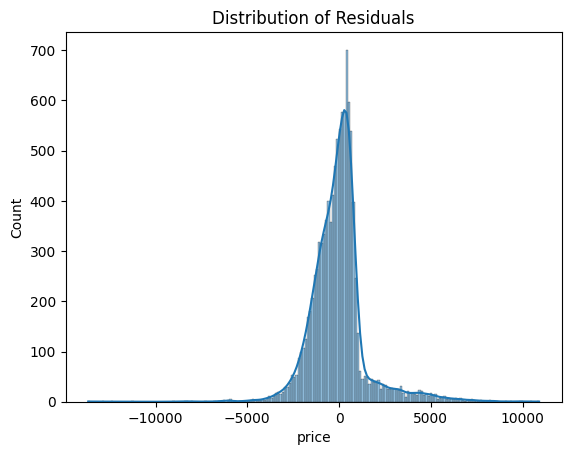

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

diamonds = sns.load_dataset('diamonds').dropna()
X = diamonds[['carat']]
y = diamonds['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred

sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

 2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)


MSE: 2401388.654479092
MAE: 1009.504742060089
RMSE: 1549.6414599768207


 3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

Scatter plot for linearity is shown for each independent variable against the dependent variable:


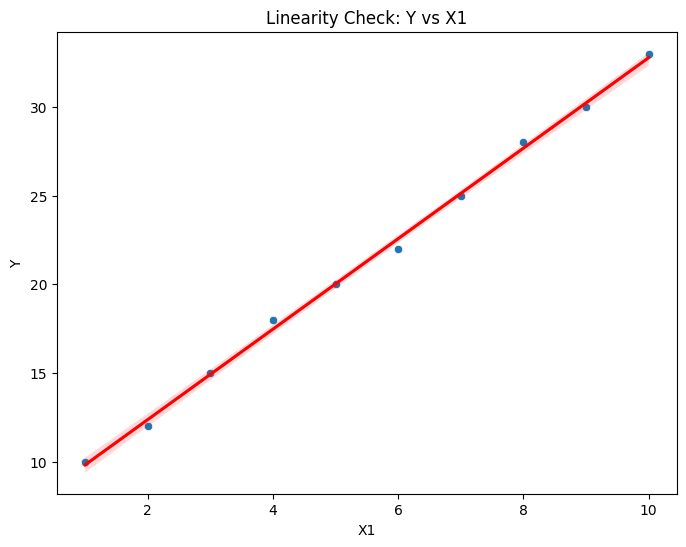

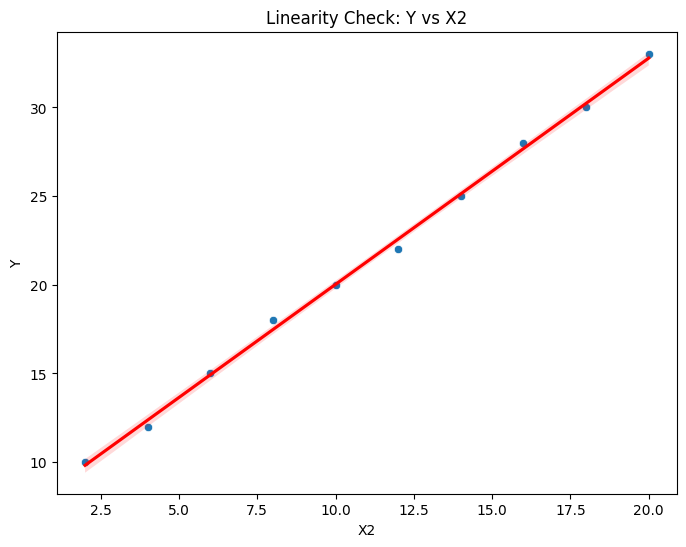

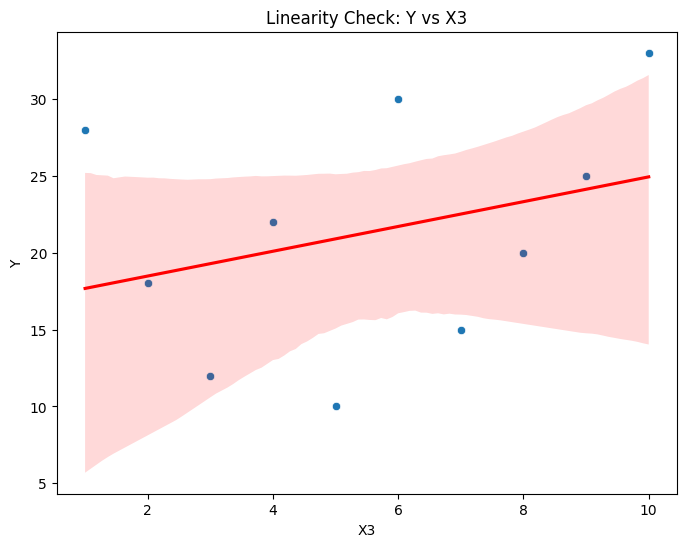

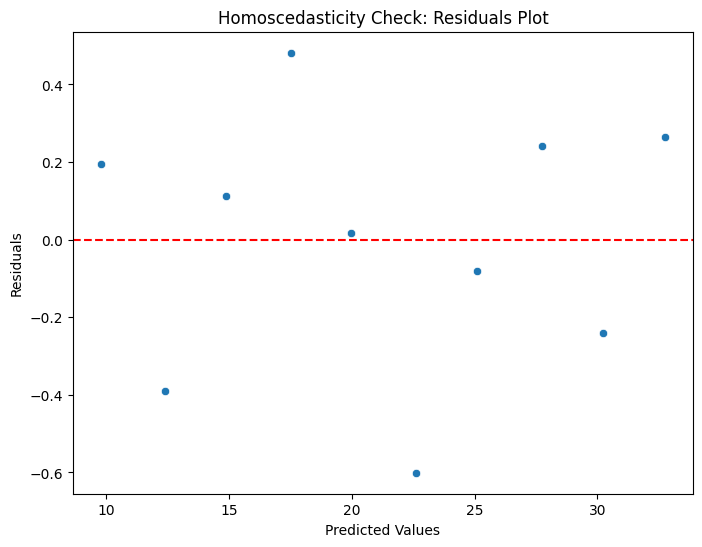

An error occurred: 'OLSResults' object has no attribute 'exog'
Please ensure your data and formula are correctly formatted.

--- Checking assumptions for a simple linear regression ---


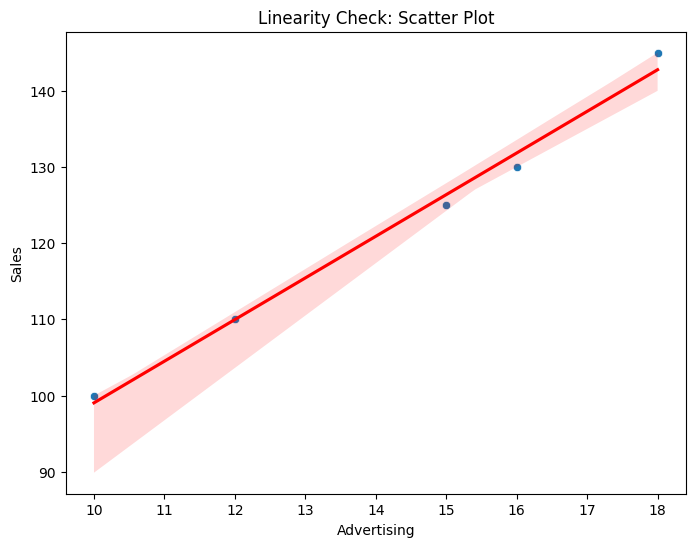

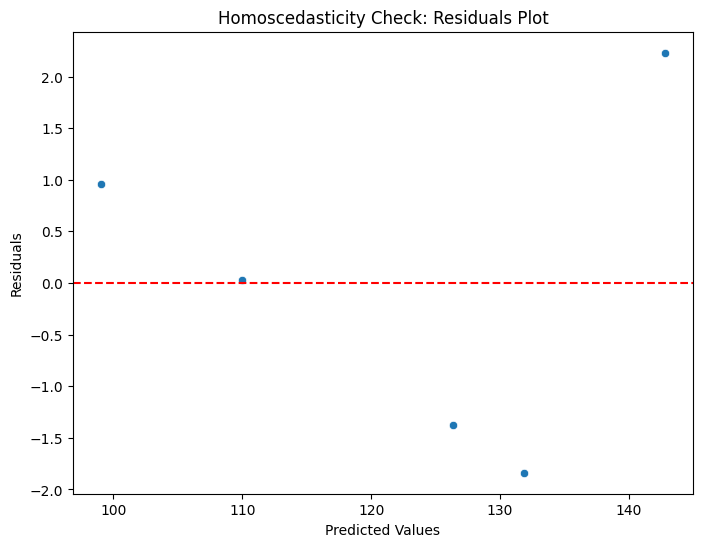

An error occurred: 'OLSResults' object has no attribute 'exog'
Please ensure your data and formula are correctly formatted.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro

def check_linear_regression_assumptions(data, formula, alpha=0.05):
    """
    Checks the assumptions of linear regression using visualizations and statistical tests.

    Args:
        data (pd.DataFrame): The dataset containing the dependent and independent variables.
        formula (str): A formula string specifying the linear model (e.g., 'dependent ~ independent1 + independent2').
        alpha (float, optional): Significance level for statistical tests. Defaults to 0.05.
    """
    try:
        # Fit the linear regression model
        model = ols(formula, data=data).fit()
        predictions = model.predict(data)
        residuals = model.resid

        # 1. Linearity Check (Scatter Plot)
        independent_vars = formula.split('~')[1].strip().split('+')
        if len(independent_vars) == 1:
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=data[independent_vars[0]], y=data[formula.split('~')[0].strip()])
            sns.regplot(x=data[independent_vars[0]], y=data[formula.split('~')[0].strip()], scatter=False, color='red')
            plt.xlabel(independent_vars[0])
            plt.ylabel(formula.split('~')[0].strip())
            plt.title('Linearity Check: Scatter Plot')
            plt.show()
        else:
            print("Scatter plot for linearity is shown for each independent variable against the dependent variable:")
            dependent_var = formula.split('~')[0].strip()
            for var in independent_vars:
                plt.figure(figsize=(8, 6))
                sns.scatterplot(x=data[var.strip()], y=data[dependent_var])
                sns.regplot(x=data[var.strip()], y=data[dependent_var], scatter=False, color='red')
                plt.xlabel(var.strip())
                plt.ylabel(dependent_var)
                plt.title(f'Linearity Check: {dependent_var} vs {var.strip()}')
                plt.show()

        # 2. Homoscedasticity Check (Residuals Plot)
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=predictions, y=residuals)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')
        plt.title('Homoscedasticity Check: Residuals Plot')
        plt.show()

        # Statistical test for homoscedasticity (Breusch-Pagan)
        bp_test = het_breuschpagan(residuals, model.exog)
        labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
        print("\nBreusch-Pagan Test for Homoscedasticity:")
        for label, value in zip(labels, bp_test):
            print(f"{label}: {value:.4f}")
        if bp_test[1] < alpha:
            print(f"The p-value ({bp_test[1]:.4f}) is less than the significance level ({alpha}).")
            print("Reject the null hypothesis of homoscedasticity. Evidence of heteroscedasticity.")
        else:
            print(f"The p-value ({bp_test[1]:.4f}) is greater than or equal to the significance level ({alpha}).")
            print("Fail to reject the null hypothesis of homoscedasticity. No strong evidence of heteroscedasticity.")

        # 3. Multicollinearity Check (Correlation Matrix)
        independent_df = data[independent_vars]
        correlation_matrix = independent_df.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Multicollinearity Check: Correlation Matrix')
        plt.show()
        print("\nCorrelation Matrix of Independent Variables:")
        print(correlation_matrix)
        print("\nInterpretation of Multicollinearity:")
        print("High correlation (close to +1 or -1) between independent variables may indicate multicollinearity.")

        # Optional: Normality of Residuals Check (Histogram and Shapiro-Wilk Test)
        plt.figure(figsize=(8, 6))
        sns.histplot(residuals, kde=True)
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.title('Normality Check: Histogram of Residuals')
        plt.show()

        shapiro_test = shapiro(residuals)
        print("\nShapiro-Wilk Test for Normality of Residuals:")
        print(f"Statistic: {shapiro_test[0]:.4f}, p-value: {shapiro_test[1]:.4f}")
        if shapiro_test[1] < alpha:
            print(f"The p-value ({shapiro_test[1]:.4f}) is less than the significance level ({alpha}).")
            print("Reject the null hypothesis of normality. Residuals may not be normally distributed.")
        else:
            print(f"The p-value ({shapiro_test[1]:.4f}) is greater than or equal to the significance level ({alpha}).")
            print("Fail to reject the null hypothesis of normality. Residuals appear to be normally distributed.")

    except Exception as e:
        print(f"An error occurred: {e}")
        print("Please ensure your data and formula are correctly formatted.")

if __name__ == "__main__":
    # Create some sample data
    data = pd.DataFrame({
        'Y': [10, 12, 15, 18, 20, 22, 25, 28, 30, 33],
        'X1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'X2': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
        'X3': [5, 3, 7, 2, 8, 4, 9, 1, 6, 10]
    })

    # Define the linear regression formula
    formula = 'Y ~ X1 + X2 + X3'

    # Check the assumptions
    check_linear_regression_assumptions(data, formula)

    # Example with only one independent variable
    data_simple = pd.DataFrame({
        'Sales': [100, 110, 125, 130, 145],
        'Advertising': [10, 12, 15, 16, 18]
    })
    formula_simple = 'Sales ~ Advertising'
    print("\n--- Checking assumptions for a simple linear regression ---")
    check_linear_regression_assumptions(data_simple, formula_simple)

4. Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import numpy as np

def create_regression_pipeline(X, y, models, scaling=True, polynomial_features=False, degree=2, test_size=0.2, random_state=42):
    """
    Creates and evaluates a machine learning pipeline for regression with feature scaling,
    polynomial features (optional), and multiple regression models.

    Args:
        X (pd.DataFrame or np.ndarray): Input features.
        y (pd.Series or np.ndarray): Target variable.
        models (dict): A dictionary of regression models to evaluate.
                        Example: {'Linear Regression': LinearRegression(),
                                  'Ridge Regression': Ridge(),
                                  'Random Forest': RandomForestRegressor()}
        scaling (bool, optional): Whether to apply StandardScaler. Defaults to True.
        polynomial_features (bool, optional): Whether to include polynomial features. Defaults to False.
        degree (int, optional): Degree of the polynomial features. Defaults to 2.
        test_size (float, optional): Proportion of the data for testing. Defaults to 0.2.
        random_state (int, optional): Random state for splitting and model initialization. Defaults to 42.

    Returns:
        dict: A dictionary containing the trained models and their performance metrics (MSE and R-squared)
              on the test set and cross validation score.
              Example: {'Linear Regression': {'model': trained_model,
                                               'test_mse': test_mse,
                                               'test_r2': test_r2,
                                               'cv_score': cv_score},
                        ...}
    """
    results = {}
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    except Exception as e:
        print(f"Error: Data splitting failed: {e}")
        return results  # Return empty results to indicate failure

    for model_name, model in models.items():
        pipeline_steps = []
        if polynomial_features:
            pipeline_steps.append(('poly', PolynomialFeatures(degree=degree)))
        if scaling:
            pipeline_steps.append(('scaler', StandardScaler()))
        pipeline_steps.append(('model', model))
        pipeline = Pipeline(steps=pipeline_steps)
        try:
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            # Change cv to 3 here
            cv_scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='r2')
            cv_score = np.mean(cv_scores)
            results[model_name] = {'model': pipeline, 'test_mse': mse, 'test_r2': r2, 'cv_score': cv_score}
            print(f"{model_name} Pipeline:\n  Test MSE: {mse:.4f}\n  Test R-squared: {r2:.4f}\n  Cross-Validation R-squared: {cv_score:.4f}")
        except Exception as e:
            error_message = str(e)
            print(f"Error training {model_name}: {error_message}")
            results[model_name] = {'model': None, 'test_mse': None, 'test_r2': None, 'cv_score': None, 'error': error_message}
    return results

if __name__ == "__main__":
    # Load sample data (replace with your actual data loading)
    # Example using a simple dataset
    data = pd.DataFrame({
        'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Feature2': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
        'Target': [15, 14, 13, 12, 11, 10, 9, 8, 7, 6]
    })
    X = data[['Feature1', 'Feature2']]
    y = data['Target']

    # Define the regression models to evaluate
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=0.1),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42)
    }

    # Create and evaluate the regression pipeline
    results = create_regression_pipeline(X, y, models, scaling=True, polynomial_features=True, degree=2)

    # Print the results
    print("\n--- Model Evaluation Results ---")
    for model_name, metrics in results.items():
        print(f"\n{model_name}:")
        if metrics['model']:
            print(f"  Test MSE: {metrics['test_mse']:.4f}")
            print(f"  Test R-squared: {metrics['test_r2']:.4f}")
            print(f"  Cross-Validation R-squared: {metrics['cv_score']:.4f}")
        else:
            print(f"  Error: {metrics.get('error', 'Model training failed')}")

Linear Regression Pipeline:
  Test MSE: 0.0000
  Test R-squared: 1.0000
  Cross-Validation R-squared: 1.0000
Ridge Regression Pipeline:
  Test MSE: 0.0120
  Test R-squared: 0.9990
  Cross-Validation R-squared: 0.9910
Lasso Regression Pipeline:
  Test MSE: 0.0169
  Test R-squared: 0.9986
  Cross-Validation R-squared: 0.9985
Decision Tree Pipeline:
  Test MSE: 1.0000
  Test R-squared: 0.9184
  Cross-Validation R-squared: 0.6980
Random Forest Pipeline:
  Test MSE: 0.0916
  Test R-squared: 0.9925
  Cross-Validation R-squared: 0.7239
Gradient Boosting Pipeline:
  Test MSE: 0.0512
  Test R-squared: 0.9958
  Cross-Validation R-squared: 0.8618

--- Model Evaluation Results ---

Linear Regression:
  Test MSE: 0.0000
  Test R-squared: 1.0000
  Cross-Validation R-squared: 1.0000

Ridge Regression:
  Test MSE: 0.0120
  Test R-squared: 0.9990
  Cross-Validation R-squared: 0.9910

Lasso Regression:
  Test MSE: 0.0169
  Test R-squared: 0.9986
  Cross-Validation R-squared: 0.9985

Decision Tree:
  Tes

 5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

def perform_linear_regression(X, y, test_size=0.2, random_state=42):
    """
    Performs simple linear regression, prints the model's coefficients, intercept, and R-squared score.

    Args:
        X (pd.DataFrame or np.ndarray): Input feature(s).  Should have only one column for simple linear regression.
        y (pd.Series or np.ndarray): Target variable.
        test_size (float, optional): Proportion of the data for testing. Defaults to 0.2.
        random_state (int, optional): Random state for splitting the data. Defaults to 42.

    Returns:
        None. Prints the model coefficients, intercept, and R-squared score.
    """
    try:
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        # Create a Linear Regression model
        model = LinearRegression()

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Get the coefficients and intercept
        coefficients = model.coef_
        intercept = model.intercept_

        # Calculate the R-squared score
        r_squared = r2_score(y_test, y_pred)

        # Print the results
        print("Linear Regression Results:")
        print(f"Coefficients: {coefficients}")
        print(f"Intercept: {intercept:.4f}")
        print(f"R-squared: {r_squared:.4f}")

    except Exception as e:
        print(f"An error occurred: {e}")
        print("Please check your input data.  For simple linear regression, X should have only one column.")

if __name__ == "__main__":
    # Load sample data (replace with your actual data)
    data = pd.DataFrame({
        'X': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y': [2, 4, 5, 4, 5, 6, 6, 8, 9, 11]
    })
    X = data[['X']]  #  X should be a DataFrame with one column
    y = data['y']

    # Perform linear regression and print results
    perform_linear_regression(X, y)

    # Example with a different dataset
    data2 = pd.DataFrame({
        'Temperature': [15, 20, 25, 30, 35, 40],
        'Sales': [100, 120, 140, 150, 160, 180]
    })
    X2 = data2[['Temperature']]
    y2 = data2['Sales']
    perform_linear_regression(X2, y2)


Linear Regression Results:
Coefficients: [0.88793103]
Intercept: 0.9914
R-squared: 0.8784
Linear Regression Results:
Coefficients: [2.6]
Intercept: 73.0000
R-squared: 0.1550


 6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualizes the results.

Linear Regression Analysis (Total Bill vs. Tip):
Coefficients: [0.10696371]
Intercept: 0.9252
R-squared: 0.5449


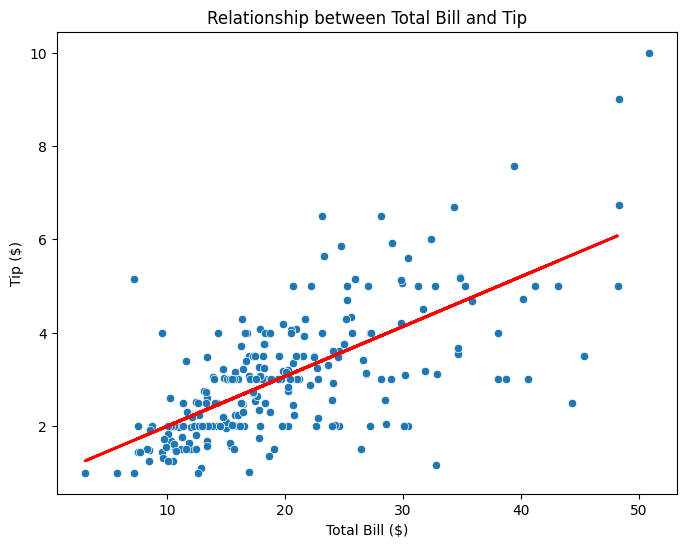

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

def analyze_tip_vs_bill(test_size=0.2, random_state=42):
    """
    Analyzes the relationship between total bill and tip using simple linear regression
    and visualizes the results with a scatter plot and regression line.

    Args:
        test_size (float, optional): Proportion of the data for testing. Defaults to 0.2.
        random_state (int, optional): Random state for splitting the data. Defaults to 42.
    """
    try:
        # Load the tips dataset from seaborn
        tips = sns.load_dataset('tips')

        # Extract the relevant variables
        X = tips[['total_bill']]  # Independent variable (total bill)
        y = tips['tip']  # Dependent variable (tip)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        # Create a Linear Regression model
        model = LinearRegression()

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Get the coefficients and intercept
        coefficients = model.coef_
        intercept = model.intercept_

        # Calculate the R-squared score
        r_squared = r2_score(y_test, y_pred)

        # Print the results
        print("Linear Regression Analysis (Total Bill vs. Tip):")
        print(f"Coefficients: {coefficients}")
        print(f"Intercept: {intercept:.4f}")
        print(f"R-squared: {r_squared:.4f}")

        # Visualize the data and the regression line
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x='total_bill', y='tip', data=tips)  # Scatter plot of the original data
        plt.plot(X_test, y_pred, color='red', linewidth=2)  # Regression line
        plt.xlabel('Total Bill ($)')
        plt.ylabel('Tip ($)')
        plt.title('Relationship between Total Bill and Tip')
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")
        print("Please check if the 'tips' dataset is loaded correctly and the columns 'total_bill' and 'tip' exist.")

if __name__ == "__main__":
    # Perform the analysis and visualize the results
    analyze_tip_vs_bill()


 7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line.

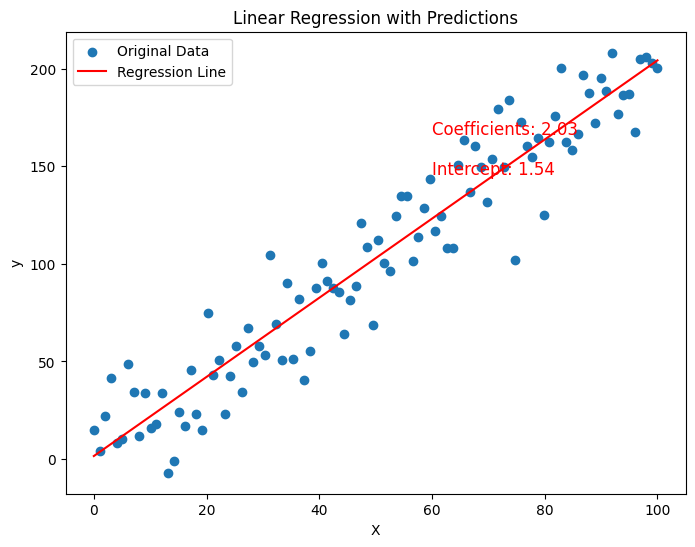

Model Coefficients: [2.02758653]
Model Intercept: 1.54


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def generate_synthetic_data(num_samples=100, noise_level=20, random_state=42):
    """
    Generates a synthetic dataset for linear regression.

    Args:
        num_samples (int, optional): Number of data points to generate. Defaults to 100.
        noise_level (float, optional): Standard deviation of the Gaussian noise added to the data. Defaults to 20.
        random_state (int, optional): Random state for reproducibility. Defaults to 42.

    Returns:
        tuple: A tuple containing the independent variable X and the dependent variable y (both NumPy arrays).
    """
    np.random.seed(random_state)  # For reproducibility
    X = np.linspace(0, 100, num_samples).reshape(-1, 1)  # Create feature X
    y = 2 * X.flatten() + 5 + np.random.normal(0, noise_level, num_samples)  # Generate target variable y with noise
    return X, y

def fit_and_predict_linear_model(X, y, X_new):
    """
    Fits a linear regression model to the given data and makes predictions on new data.

    Args:
        X (np.ndarray): Training data features.
        y (np.ndarray): Training data target variable.
        X_new (np.ndarray): New data points for prediction.

    Returns:
        tuple: A tuple containing the trained model, predictions for X_new, coefficients, and intercept.
    """
    model = LinearRegression()  # Create a linear regression model
    model.fit(X, y)  # Fit the model to the training data
    y_pred = model.predict(X_new)  # Predict on the new data
    coefficients = model.coef_
    intercept = model.intercept_
    return model, y_pred, coefficients, intercept

def plot_data_and_predictions(X, y, X_new, y_pred, coefficients, intercept):
    """
    Plots the original data points and the regression line (predictions).

    Args:
        X (np.ndarray): Training data features.
        y (np.ndarray): Training data target variable.
        X_new (np.ndarray): New data points used for prediction.
        y_pred (np.ndarray): Predictions for X_new.
        coefficients (np.ndarray): The coefficients of the linear regression model.
        intercept (float): The intercept of the linear regression model.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, label='Original Data')  # Plot the original data points
    plt.plot(X_new, y_pred, color='red', label='Regression Line')  # Plot the regression line
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Linear Regression with Predictions')
    plt.legend()

    # Add text to the plot showing the coefficients and intercept
    plt.text(X.max() * 0.6, y.max() * 0.8, f'Coefficients: {coefficients[0]:.2f}', fontsize=12, color='red')
    plt.text(X.max() * 0.6, y.max() * 0.7, f'Intercept: {intercept:.2f}', fontsize=12, color='red')

    plt.show()

if __name__ == "__main__":
    # 1. Generate synthetic data
    X, y = generate_synthetic_data()

    # 2. Create new data points for prediction
    X_new = np.linspace(0, 100, 100).reshape(-1, 1)  # Create X_new for predictions

    # 3. Fit the model and make predictions
    model, y_pred, coefficients, intercept = fit_and_predict_linear_model(X, y, X_new)

    # 4. Plot the results
    plot_data_and_predictions(X, y, X_new, y_pred, coefficients, intercept)

    # Print the model parameters
    print(f"Model Coefficients: {coefficients}")
    print(f"Model Intercept: {intercept:.2f}")


8. Write a Python script that pickles a trained linear regression model and saves it to a file.

In [ ]:
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression

def generate_synthetic_data(num_samples=100, noise_level=20, random_state=42):
    """
    Generates a synthetic dataset for linear regression.

    Args:
        num_samples (int, optional): Number of data points to generate. Defaults to 100.
        noise_level (float, optional): Standard deviation of the Gaussian noise added to the data. Defaults to 20.
        random_state (int, optional): Random state for reproducibility. Defaults to 42.

    Returns:
        tuple: A tuple containing the independent variable X and the dependent variable y (both NumPy arrays).
    """
    np.random.seed(random_state)  # For reproducibility
    X = np.linspace(0, 100, num_samples).reshape(-1, 1)  # Create feature X
    y = 2 * X.flatten() + 5 + np.random.normal(0, noise_level, num_samples)  # Generate target variable y with noise
    return X, y

def train_linear_regression_model(X, y):
    """
    Fits a linear regression model to the given data.

    Args:
        X (np.ndarray): Training data features.
        y (np.ndarray): Training data target variable.

    Returns:
        LinearRegression: The trained linear regression model.
    """
    model = LinearRegression()  # Create a linear regression model
    model.fit(X, y)  # Fit the model to the training data
    return model

def save_model_to_file(model, filename="linear_regression_model.pkl"):
    """
    Pickles the trained linear regression model and saves it to a file.

    Args:
        model (LinearRegression): The trained linear regression model to save.
        filename (str, optional): The name of the file to save the model to.
            Defaults to "linear_regression_model.pkl".
    """
    try:
        with open(filename, 'wb') as file:  # Open the file in binary write mode
            pickle.dump(model, file)  # Pickle and save the model
        print(f"Model successfully saved to {filename}")
    except Exception as e:
        print(f"Error saving model to file: {e}")

if __name__ == "__main__":
    # 1. Generate synthetic data
    X, y = generate_synthetic_data()

    # 2. Train the linear regression model
    model = train_linear_regression_model(X, y)

    # 3. Save the trained model to a file
    save_model_to_file(model)


Model successfully saved to linear_regression_model.pkl


9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve.

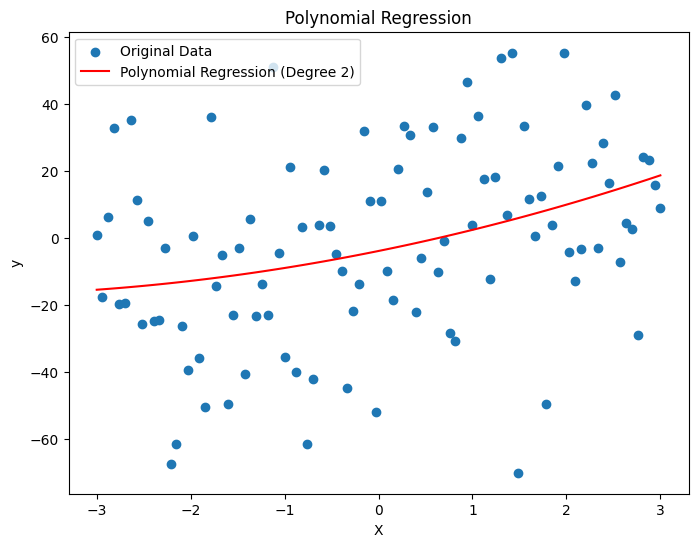

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def generate_synthetic_data(num_samples=100, noise_level=30, random_state=42):
    """
    Generates a synthetic dataset for polynomial regression.

    Args:
        num_samples (int, optional): Number of data points to generate. Defaults to 100.
        noise_level (float, optional): Standard deviation of the Gaussian noise. Defaults to 30.
        random_state (int, optional): Random state for reproducibility. Defaults to 42.

    Returns:
        tuple: A tuple containing the independent variable X and the dependent variable y (both NumPy arrays).
    """
    np.random.seed(random_state)
    X = np.linspace(-3, 3, num_samples).reshape(-1, 1)  # Feature X
    y = 2 * X.flatten() + 3 * X.flatten() + 1 + np.random.normal(0, noise_level, num_samples)  # Target variable y with noise
    return X, y

def fit_polynomial_regression(X, y, degree=2):
    """
    Fits a polynomial regression model to the given data.

    Args:
        X (np.ndarray): Input features.
        y (np.ndarray): Target variable.
        degree (int, optional): Degree of the polynomial. Defaults to 2.

    Returns:
        tuple: A tuple containing the trained model and the polynomial features object.
    """
    poly_features = PolynomialFeatures(degree=degree)  # Create polynomial features
    X_poly = poly_features.fit_transform(X)  # Transform X to include polynomial terms
    model = LinearRegression()  # Create a linear regression model
    model.fit(X_poly, y)  # Fit the model to the polynomial features
    return model, poly_features

def plot_polynomial_regression(X, y, model, poly_features):
    """
    Plots the original data points and the polynomial regression curve.

    Args:
        X (np.ndarray): Input features.
        y (np.ndarray): Target variable.
        model (LinearRegression): The trained polynomial regression model.
        poly_features (PolynomialFeatures): The polynomial features object.
    """
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Generate points for the curve
    X_plot_poly = poly_features.transform(X_plot)  # Transform the points
    y_plot = model.predict(X_plot_poly)  # Predict y values

    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, label='Original Data')  # Scatter plot of original data
    plt.plot(X_plot, y_plot, color='red', label=f'Polynomial Regression (Degree {poly_features.degree})')  # Plot the curve
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Polynomial Regression')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # 1. Generate synthetic data
    X, y = generate_synthetic_data()

    # 2. Fit the polynomial regression model
    model, poly_features = fit_polynomial_regression(X, y, degree=2)

    # 3. Plot the results
    plot_polynomial_regression(X, y, model, poly_features)


10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model's coefficient and intercept.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

def generate_synthetic_data_for_linear_regression(num_samples=100, random_state=42):
    """
    Generates synthetic data for simple linear regression.

    Args:
        num_samples (int, optional): Number of data points to generate. Defaults to 100.
        random_state (int, optional): Random state for reproducibility. Defaults to 42.

    Returns:
        tuple: A tuple containing the independent variable X and the dependent variable y (both NumPy arrays).
    """
    np.random.seed(random_state)  # For reproducibility
    X = np.random.rand(num_samples).reshape(-1, 1)  # Generate random values for X
    y = 2 * X + 5 + np.random.randn(num_samples).reshape(-1, 1) # Generate y with a linear relationship and noise
    return X, y

def fit_linear_regression_model(X, y):
    """
    Fits a linear regression model to the given data.

    Args:
        X (np.ndarray): Input features.
        y (np.ndarray): Target variable.

    Returns:
        LinearRegression: The trained linear regression model.
    """
    model = LinearRegression()  # Create a linear regression model
    model.fit(X, y)  # Fit the model to the data
    return model

if __name__ == "__main__":
    # 1. Generate synthetic data
    X, y = generate_synthetic_data_for_linear_regression()

    # 2. Fit the linear regression model
    model = fit_linear_regression_model(X, y)

    # 3. Print the model's coefficients and intercept
    print("Model Coefficients:", model.coef_)
    print("Model Intercept:", model.intercept_)



Model Coefficients: [[1.54022677]]
Model Intercept: [5.21509616]


 11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and compares their performance.

Polynomial Regression Model Comparison:
Degree 1: MSE = 1574.41, R-squared = 0.01
Degree 2: MSE = 1549.08, R-squared = 0.02
Degree 3: MSE = 1505.62, R-squared = 0.05
Degree 4: MSE = 1587.21, R-squared = 0.00
Degree 5: MSE = 1622.82, R-squared = -0.02
Degree 6: MSE = 1630.80, R-squared = -0.03


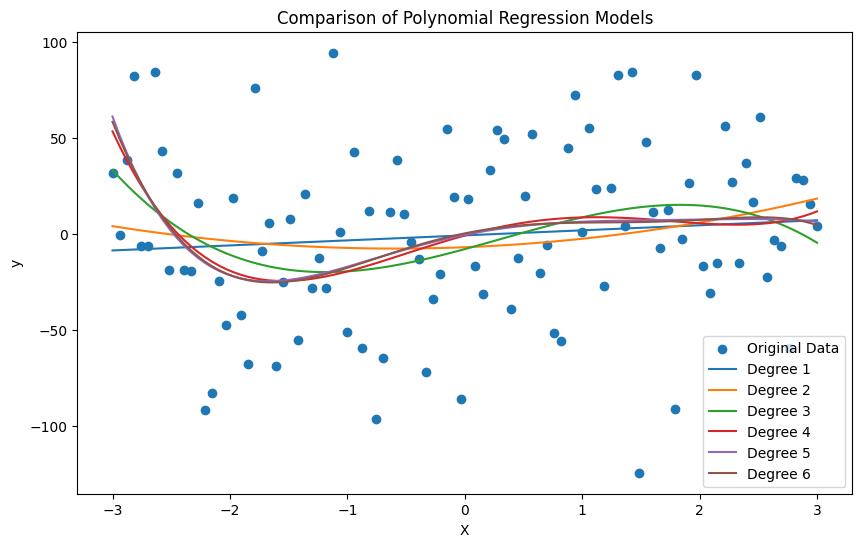

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def generate_synthetic_data_for_polynomial_regression(num_samples=100, noise_level=50, random_state=42):
    """
    Generates synthetic data for polynomial regression.

    Args:
        num_samples (int, optional): Number of data points. Defaults to 100.
        noise_level (float, optional): Noise standard deviation. Defaults to 50.
        random_state (int, optional): Random state for reproducibility. Defaults to 42.

    Returns:
        tuple: A tuple containing X and y (NumPy arrays).
    """
    np.random.seed(random_state)
    X = np.linspace(-3, 3, num_samples).reshape(-1, 1)
    y = X**2 + 1.5*X + 2 + np.random.normal(0, noise_level, num_samples).reshape(-1, 1) #Make y a column vector
    return X, y

def fit_and_evaluate_polynomial_regression(X, y, degree, test_size=0.2, random_state=42):
    """
    Fits a polynomial regression model and evaluates its performance.

    Args:
        X (np.ndarray): Input features.
        y (np.ndarray): Target variable.
        degree (int): Degree of the polynomial.
        test_size (float, optional): Proportion of data for testing. Defaults to 0.2.
        random_state (int, optional): Random state for splitting. Defaults to 42.

    Returns:
        tuple: A tuple containing the trained model, MSE on the test set, and R-squared on the test set.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    r2 = model.score(X_test_poly, y_test) # Get R-squared
    return model, mse, r2

def compare_polynomial_models(X, y, degrees, test_size=0.2, random_state=42):
    """
    Compares polynomial regression models of different degrees.

    Args:
        X (np.ndarray): Input features.
        y (np.ndarray): Target variable.
        degrees (list): List of polynomial degrees to compare.
        test_size (float, optional): Proportion of data for testing. Defaults to 0.2.
        random_state (int, optional): Random state. Defaults to 42.
    """
    results = {}
    for degree in degrees:
        model, mse, r2 = fit_and_evaluate_polynomial_regression(X, y, degree, test_size, random_state)
        results[degree] = {'model': model, 'mse': mse, 'r2': r2}

    # Print the comparison results
    print("Polynomial Regression Model Comparison:")
    for degree, metrics in results.items():
        print(f"Degree {degree}: MSE = {metrics['mse']:.2f}, R-squared = {metrics['r2']:.2f}")

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, label='Original Data')
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    for degree in degrees:
        model = results[degree]['model']
        poly_features = PolynomialFeatures(degree=degree)
        X_plot_poly = poly_features.fit_transform(X_plot) # Use fit_transform
        y_plot = model.predict(X_plot_poly)
        plt.plot(X_plot, y_plot, label=f'Degree {degree}')

    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Comparison of Polynomial Regression Models')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # Generate synthetic data
    X, y = generate_synthetic_data_for_polynomial_regression()

    # Define the polynomial degrees to compare
    degrees = [1, 2, 3, 4, 5, 6]

    # Compare the models
    compare_polynomial_models(X, y, degrees)


 12. Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

def perform_multiple_linear_regression(X, y, test_size=0.2, random_state=42):
    """
    Performs multiple linear regression, prints the model's coefficients, intercept, and R-squared score.

    Args:
        X (pd.DataFrame or np.ndarray): Input features (should have two columns).
        y (pd.Series or np.ndarray): Target variable.
        test_size (float, optional): Proportion of the data for testing. Defaults to 0.2.
        random_state (int, optional): Random state for splitting the data. Defaults to 42.

    Returns:
        None. Prints the model coefficients, intercept, and R-squared score.
    """
    try:
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        # Create a Linear Regression model
        model = LinearRegression()

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Get the coefficients and intercept
        coefficients = model.coef_
        intercept = model.intercept_

        # Calculate the R-squared score
        r_squared = r2_score(y_test, y_pred)

        # Print the results
        print("Multiple Linear Regression Results:")
        print(f"Coefficients: {coefficients}")
        print(f"Intercept: {intercept:.4f}")
        print(f"R-squared: {r_squared:.4f}")

    except Exception as e:
        print(f"An error occurred: {e}")
        print("Please check your input data. X should have two columns.")

if __name__ == "__main__":
    # Load sample data (replace with your actual data)
    data = pd.DataFrame({
        'X1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'X2': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
        'y': [21, 23, 25, 27, 29, 31, 33, 35, 37, 39]
    })
    X = data[['X1', 'X2']]  # X is a DataFrame with two columns
    y = data['y']

    # Perform multiple linear regression and print results
    perform_multiple_linear_regression(X, y)

    # Example with a different dataset
    data2 = pd.DataFrame({
        'Temperature': [15, 20, 25, 30, 35, 40],
        'Humidity': [80, 75, 70, 65, 60, 55],
        'Sales': [120, 130, 145, 160, 175, 190]
    })
    X2 = data2[['Temperature', 'Humidity']]
    y2 = data2['Sales']
    perform_multiple_linear_regression(X2, y2)


Multiple Linear Regression Results:
Coefficients: [1. 1.]
Intercept: 9.0000
R-squared: 1.0000
Multiple Linear Regression Results:
Coefficients: [ 1.5 -1.5]
Intercept: 212.5000
R-squared: 0.5000


 13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points.

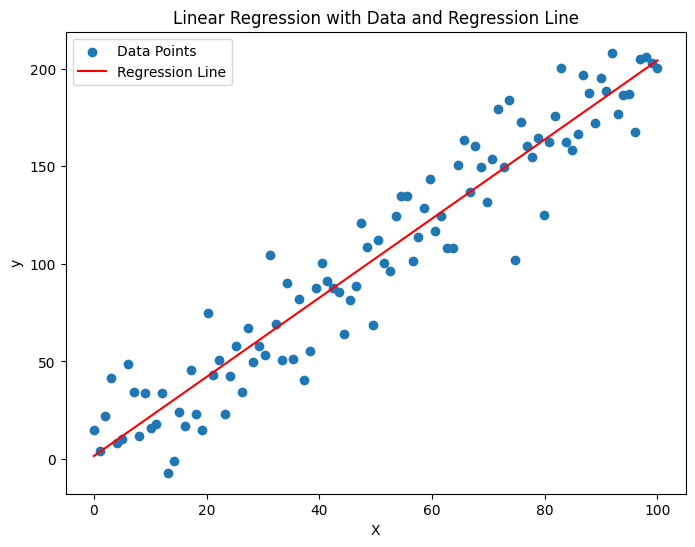

Model Coefficients: [2.02758653]
Model Intercept: 1.54


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def generate_synthetic_data(num_samples=100, noise_level=20, random_state=42):
    """
    Generates synthetic data for linear regression.

    Args:
        num_samples (int, optional): Number of data points to generate. Defaults to 100.
        noise_level (float, optional): Standard deviation of the Gaussian noise added to the data. Defaults to 20.
        random_state (int, optional): Random state for reproducibility. Defaults to 42.

    Returns:
        tuple: A tuple containing the independent variable X and the dependent variable y (both NumPy arrays).
    """
    np.random.seed(random_state)  # For reproducibility
    X = np.linspace(0, 100, num_samples).reshape(-1, 1)  # Create feature X
    y = 2 * X.flatten() + 5 + np.random.normal(0, noise_level, num_samples)  # Generate target variable y with noise
    return X, y

def fit_linear_regression_model(X, y):
    """
    Fits a linear regression model to the given data.

    Args:
        X (np.ndarray): Training data features.
        y (np.ndarray): Training data target variable.

    Returns:
        LinearRegression: The trained linear regression model.
    """
    model = LinearRegression()  # Create a linear regression model
    model.fit(X, y)  # Fit the model to the training data
    return model

def plot_data_and_regression_line(X, y, model):
    """
    Plots the original data points and the regression line.

    Args:
        X (np.ndarray): Input features.
        y (np.ndarray): Target variable.
        model (LinearRegression): The trained linear regression model.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, label='Data Points')  # Plot the original data points
    plt.plot(X, model.predict(X), color='red', label='Regression Line')  # Plot the regression line
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Linear Regression with Data and Regression Line')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # 1. Generate synthetic data
    X, y = generate_synthetic_data()

    # 2. Fit the linear regression model
    model = fit_linear_regression_model(X, y)

    # 3. Plot the data and the regression line
    plot_data_and_regression_line(X, y, model)

    # 4. Print the model's coefficients and intercept
    print(f"Model Coefficients: {model.coef_}")
    print(f"Model Intercept: {model.intercept_:.2f}")


14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features.

In [2]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataframe):
    """
    Calculates the Variance Inflation Factor (VIF) for each feature in a DataFrame,
    handling potential perfect multicollinearity.

    Args:
        dataframe (pd.DataFrame): The input DataFrame containing the features.
                                   Ensure that the DataFrame only contains the independent variables
                                   for which you want to calculate VIF.

    Returns:
        pd.DataFrame: A DataFrame with two columns: 'Feature' and 'VIF'.
                       The 'VIF' column contains the Variance Inflation Factor for each feature.
                       Features with perfect multicollinearity will have a VIF of infinity ('inf').
    """
    vif_data = pd.DataFrame()
    vif_data["Feature"] = dataframe.columns
    vif_values = []
    for i in range(len(dataframe.columns)):
        try:
            vif = variance_inflation_factor(dataframe.values, i)
            vif_values.append(vif)
        except ZeroDivisionError:
            vif_values.append(float('inf'))  # Represent perfect multicollinearity as infinity
    vif_data["VIF"] = vif_values
    return vif_data

if __name__ == "__main__":
    # Create a sample DataFrame with perfect multicollinearity
    data = {
        'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Feature2': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],  # Perfectly correlated with Feature1
        'Feature3': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
        'Feature4': [5, 5, 6, 6, 7, 7, 8, 8, 9, 9]
    }
    df = pd.DataFrame(data)

    # Calculate VIF
    vif_df = calculate_vif(df)

    # Print the VIF results
    print("Variance Inflation Factor (VIF):")
    print(vif_df)

    # Interpret the VIF values (common thresholds)
    print("\nInterpretation of VIF values:")
    print("- VIF = 1: No multicollinearity")
    print("- 1 < VIF < 5: Moderate multicollinearity")
    print("- VIF >= 5: High multicollinearity")
    print("- VIF = inf: Perfect multicollinearity")

    # Demonstrate how to handle perfect multicollinearity
    print("\nRecommendations for handling perfect multicollinearity:")
    if any(vif_df['VIF'] == float('inf')):
        perfectly_collinear_features = vif_df[vif_df['VIF'] == float('inf')]['Feature'].tolist()
        print(f"The following features exhibit perfect multicollinearity: {perfectly_collinear_features}")
        print("Consider removing one of these features to resolve the issue.")

Variance Inflation Factor (VIF):
    Feature         VIF
0  Feature1         inf
1  Feature2         inf
2  Feature3  100.068182
3  Feature4   33.000000

Interpretation of VIF values:
- VIF = 1: No multicollinearity
- 1 < VIF < 5: Moderate multicollinearity
- VIF >= 5: High multicollinearity
- VIF = inf: Perfect multicollinearity

Recommendations for handling perfect multicollinearity:
The following features exhibit perfect multicollinearity: ['Feature1', 'Feature2']
Consider removing one of these features to resolve the issue.


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


 15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a polynomial regression model, and plots the regression curve.

Learned Coefficients: [   0.           33.62704411 -114.1888671   155.51387547  -68.07561683]
Learned Intercept: -2.8379314521829864
Mean Squared Error: 81.62


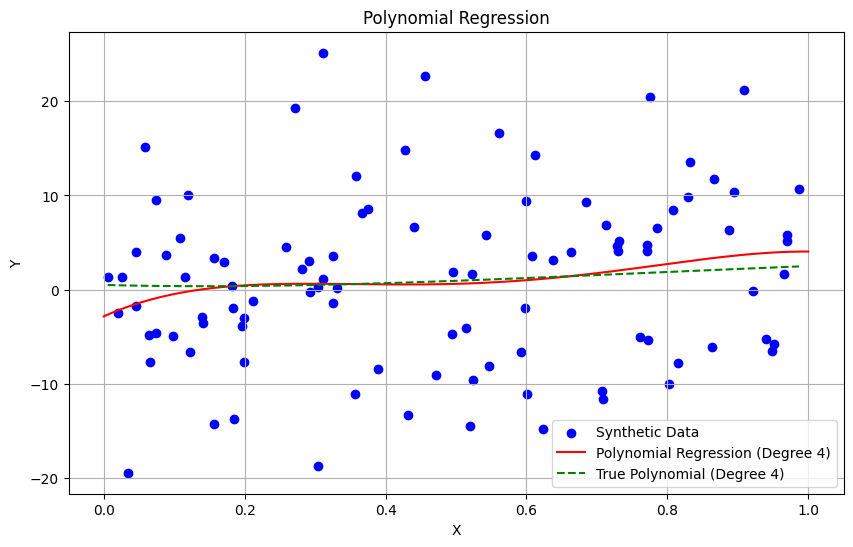

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Generate Synthetic Data
np.random.seed(42)  # for reproducibility
n_samples = 100
true_degree = 4
noise_scale = 10

# Generate random x values
X = np.sort(np.random.rand(n_samples))

# Define the true polynomial coefficients (you can change these)
true_coefficients = [1, -5, 8, -2, 0.5]  # Coefficients for x^4, x^3, x^2, x^1, x^0

# Calculate the true y values based on the polynomial
y_true = np.polyval(true_coefficients, X)

# Add random noise to the y values
y = y_true + np.random.normal(0, noise_scale, n_samples)

# Reshape X for scikit-learn (it expects a 2D array)
X = X.reshape(-1, 1)

# 2. Fit Polynomial Regression Model
# Define the degree of the polynomial to fit
fit_degree = 4

# Create polynomial features
poly_features = PolynomialFeatures(degree=fit_degree)
X_poly = poly_features.fit_transform(X)

# Fit a linear regression model on the polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# Get the learned coefficients
learned_coefficients = model.coef_
learned_intercept = model.intercept_
print("Learned Coefficients:", learned_coefficients)
print("Learned Intercept:", learned_intercept)

# Make predictions using the polynomial model
y_predicted = model.predict(X_poly)

# Evaluate the model
mse = mean_squared_error(y, y_predicted)
print(f"Mean Squared Error: {mse:.2f}")

# 3. Plot the Regression Curve
# Generate more x values for a smoother curve
X_plot = np.linspace(0, 1, 200).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot_predicted = model.predict(X_plot_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Synthetic Data')
plt.plot(X_plot, y_plot_predicted, color='red', label=f'Polynomial Regression (Degree {fit_degree})')
plt.plot(X, y_true, color='green', linestyle='--', label=f'True Polynomial (Degree {true_degree})')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()

16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple linear regression model, and prints the R-squared score.

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

# 1. Generate Synthetic Data for Multiple Linear Regression
np.random.seed(42)
n_samples = 100
n_features = 3

# Generate independent variables (features)
X = np.random.rand(n_samples, n_features) * 10

# Define true coefficients and intercept
true_coefficients = np.array([2, -1.5, 3])
true_intercept = 5

# Generate dependent variable (target) with a linear relationship and noise
y = np.dot(X, true_coefficients) + true_intercept + np.random.normal(0, 5, n_samples)

# 2. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create the Machine Learning Pipeline
# The pipeline consists of two steps:
#    - StandardScaler: For standardizing the features (mean=0, variance=1)
#    - LinearRegression: The multiple linear regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# 4. Train the Pipeline
pipeline.fit(X_train, y_train)

# 5. Make Predictions on the Test Set
y_pred = pipeline.predict(X_test)

# 6. Evaluate the Model: Calculate R-squared Score
r_squared = r2_score(y_test, y_pred)

# 7. Print the R-squared Score
print(f"R-squared Score on the Test Set: {r_squared:.4f}")

# Optional: Print the learned coefficients and intercept from the linear regression model
# Note: These are accessed through the 'regressor' step of the pipeline
learned_coefficients = pipeline.named_steps['regressor'].coef_
learned_intercept = pipeline.named_steps['regressor'].intercept_

print("\nLearned Coefficients:", learned_coefficients)
print("Learned Intercept:", learned_intercept)

R-squared Score on the Test Set: 0.6923

Learned Coefficients: [ 5.81642718 -4.78633268  9.66140969]
Learned Intercept: 22.540055311974452


17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve.

Learned Coefficients (including intercept): [  0.          25.66243981 -55.19490261  36.95725032]
Learned Intercept: -3.0552052128678255
Mean Squared Error: 183.86


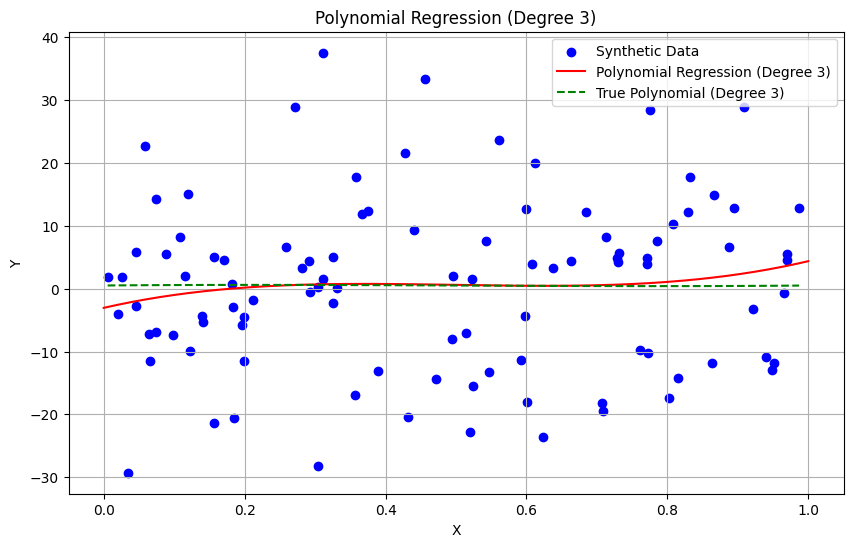

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Generate Synthetic Data for Polynomial Regression
np.random.seed(42)
n_samples = 100
true_degree = 3
noise_scale = 15

# Generate random x values
X = np.sort(np.random.rand(n_samples))

# Define the true polynomial coefficients (for degree 3)
true_coefficients = [2, -3, 1, 0.5]  # Coefficients for x^3, x^2, x^1, x^0

# Calculate the true y values based on the polynomial
y_true = np.polyval(true_coefficients, X)

# Add random noise to the y values
y = y_true + np.random.normal(0, noise_scale, n_samples)

# Reshape X for scikit-learn
X = X.reshape(-1, 1)

# 2. Perform Polynomial Regression (Degree 3)
fit_degree = 3

# Create polynomial features
poly_features = PolynomialFeatures(degree=fit_degree)
X_poly = poly_features.fit_transform(X)

# Fit a linear regression model on the polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# Get the learned coefficients
learned_coefficients = model.coef_
learned_intercept = model.intercept_
print("Learned Coefficients (including intercept):", learned_coefficients)
print("Learned Intercept:", learned_intercept)

# Make predictions using the polynomial model
y_predicted = model.predict(X_poly)

# Evaluate the model
mse = mean_squared_error(y, y_predicted)
print(f"Mean Squared Error: {mse:.2f}")

# 3. Plot the Regression Curve
# Generate more x values for a smoother curve
X_plot = np.linspace(0, 1, 200).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot_predicted = model.predict(X_plot_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Synthetic Data')
plt.plot(X_plot, y_plot_predicted, color='red', label=f'Polynomial Regression (Degree {fit_degree})')
plt.plot(X, y_true, color='green', linestyle='--', label=f'True Polynomial (Degree {true_degree})')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Polynomial Regression (Degree {fit_degree})')
plt.legend()
plt.grid(True)
plt.show()

 18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print the R-squared score and model coefficients.

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Generate Synthetic Data for Multiple Linear Regression
np.random.seed(42)
n_samples = 100
n_features = 5

# Generate independent variables (features)
X = np.random.rand(n_samples, n_features) * 10

# Define true coefficients and intercept
true_coefficients = np.array([1.5, -0.8, 2.1, 0.5, -1.2])
true_intercept = 3

# Generate dependent variable (target) with a linear relationship and noise
y = np.dot(X, true_coefficients) + true_intercept + np.random.normal(0, 5, n_samples)

# 2. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and Train the Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make Predictions on the Test Set
y_pred = model.predict(X_test)

# 5. Evaluate the Model: Calculate R-squared Score
r_squared = r2_score(y_test, y_pred)

# 6. Print the R-squared Score and Model Coefficients
print(f"R-squared Score on the Test Set: {r_squared:.4f}")
print("\nModel Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

R-squared Score on the Test Set: 0.6169

Model Coefficients: [ 1.32647934 -0.91696166  2.42395165  0.5727923  -1.42282008]
Model Intercept: 3.7299237199349413


 19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the data points along with the regression line.

Learned Slope: 1.87
Learned Intercept: 8.22


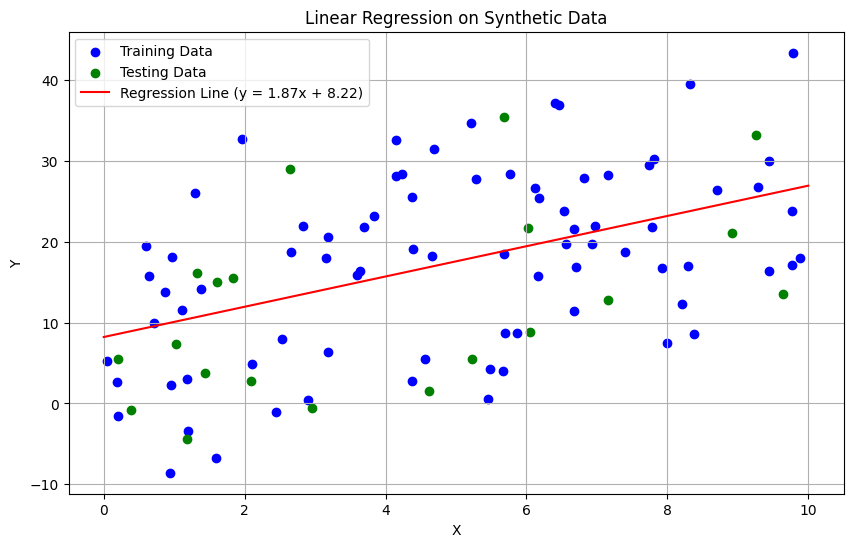

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. Generate Synthetic Data for Linear Regression
np.random.seed(0)  # for reproducibility
n_samples = 100
true_slope = 2
true_intercept = 5
noise_scale = 10

# Generate random x values
X = np.random.rand(n_samples, 1) * 10  # Values between 0 and 10

# Generate y values with a linear relationship and noise
# Reshape y to have the same number of rows as X
y = true_slope * X + true_intercept + np.random.normal(0, noise_scale, (n_samples, 1))

# 2. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 3. Fit the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the learned slope and intercept
learned_slope = model.coef_[0]  # Access the scalar value from the array
learned_intercept = model.intercept_
print(f"Learned Slope: {learned_slope[0]:.2f}")
print(f"Learned Intercept: {learned_intercept[0]:.2f}")

# 4. Generate Predictions for the Regression Line
# Use the full range of X for plotting the line
X_line = np.linspace(0, 10, 100).reshape(-1, 1)
y_line = model.predict(X_line)

# 5. Visualize the Data Points and the Regression Line
plt.figure(figsize=(10, 6))

# y_train and y_test are now 2D arrays, so we need to flatten them for scatter plot
plt.scatter(X_train, y_train.flatten(), color='blue', label='Training Data')
plt.scatter(X_test, y_test.flatten(), color='green', label='Testing Data')
plt.plot(X_line, y_line, color='red', label=f'Regression Line (y = {learned_slope[0]:.2f}x + {learned_intercept[0]:.2f})')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression on Synthetic Data')
plt.legend()
plt.grid(True)
plt.show()

 20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's R squared score and coefficients.

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Generate Synthetic Data for Multiple Linear Regression
np.random.seed(42)  # for reproducibility
n_samples = 100
n_features = 3  # Changed to 3 features

# Generate independent variables (features)
X = np.random.rand(n_samples, n_features) * 10

# Define true coefficients and intercept
true_coefficients = np.array([2, -1.5, 3])  # Adjusted to 3 coefficients
true_intercept = 5

# Generate dependent variable (target) with a linear relationship and noise
y = np.dot(X, true_coefficients) + true_intercept + np.random.normal(0, 5, n_samples)

# 2. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and Train the Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make Predictions on the Test Set
y_pred = model.predict(X_test)

# 5. Evaluate the Model: Calculate R-squared Score
r_squared = r2_score(y_test, y_pred)

# 6. Print the R-squared Score and Model Coefficients
print(f"R-squared Score on the Test Set: {r_squared:.4f}")
print("\nModel Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


R-squared Score on the Test Set: 0.6923

Model Coefficients: [ 2.05294884 -1.537697    3.34302962]
Model Intercept: 4.574947791835424


 21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using joblib instead of pickling.

In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from joblib import dump, load  # Import dump and load from joblib

# 1. Generate Synthetic Data
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = np.dot(X, np.array([2, 3])) + 5 + np.random.randn(100)  # Linear relationship with noise

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train a Model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Serialize the Model using joblib
filename = 'my_model.joblib'  # Use .joblib extension
dump(model, filename)  # Replace pickle.dump with dump

print(f"Model saved to {filename}")

# 5. Deserialize the Model using joblib
loaded_model = load(filename)  # Replace pickle.load with load

print("\nModel loaded successfully!")

# 6. Make Predictions with the Loaded Model
predictions = loaded_model.predict(X_test)
print("\nPredictions:", predictions[:5])  # Print the first 5 predictions

# 7.  Verify the Loaded Model
# Check if the loaded model is the same as the original model.
# For simple models like LinearRegression, we can compare coefficients and intercept.
if (model.coef_ == loaded_model.coef_).all() and model.intercept_ == loaded_model.intercept_:
    print("\nLoaded model is identical to the original model.")
else:
    print("\nLoaded model is different from the original model.")

# 8. Clean up (optional)
import os
os.remove(filename)  # remove the saved model file
print(f"\nRemoved {filename}")


Model saved to my_model.joblib

Model loaded successfully!

Predictions: [6.08786964 8.26679083 7.76125393 7.46422479 8.35745482]

Loaded model is identical to the original model.

Removed my_model.joblib


22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seaborn 'tips' dataset.

In [21]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

def linear_regression_with_categorical(df):
    """
    Performs linear regression on the Seaborn 'tips' dataset, handling categorical features
    using one-hot encoding.

    Args:
        df (pd.DataFrame): The input DataFrame, expected to be the Seaborn 'tips' dataset.

    Returns:
        None. Prints the R-squared score and coefficients.
    """

    # 1. Handle Missing Values (if any)
    # Check for missing values in the entire DataFrame
    if df.isnull().any().any():
        print("Missing values detected. Handling them by dropping rows with any missing value.")
        df = df.dropna()  # Drop rows with any missing values
    else:
        print("No missing values detected.")

    # 2. Separate Features and Target Variable
    X = df.drop('total_bill', axis=1)  # Features (independent variables)
    y = df['total_bill']  # Target variable (dependent variable)

    # 3. Identify Categorical Features
    categorical_features = X.select_dtypes(include=['object', 'category']).columns
    numerical_features = X.select_dtypes(exclude=['object', 'category']).columns

    print(f"Categorical features: {categorical_features}")
    print(f"Numerical features: {numerical_features}")

    # 4. One-Hot Encode Categorical Features
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    X_encoded = encoder.fit_transform(X[categorical_features])

    # Create a DataFrame from the encoded features
    X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))

    # Concatenate the encoded features with the numerical features
    X_processed = pd.concat([X[numerical_features].reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)


    # 5. Split Data into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

    # 6. Train the Linear Regression Model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 7. Make Predictions
    y_pred = model.predict(X_test)

    # 8. Evaluate the Model
    r_squared = r2_score(y_test, y_pred)
    print(f"R-squared Score: {r_squared:.4f}")

    # 9. Print Model Coefficients
    print("\nModel Coefficients:")
    # print(model.coef_)  # prints the coefficients without feature names
    # To print feature names along with coefficients, create a dataframe:
    coefficients_df = pd.DataFrame({
        "Feature": X_processed.columns,
        "Coefficient": model.coef_
    })
    print(coefficients_df)

    print(f"\nModel Intercept: {model.intercept_:.4f}")

if __name__ == "__main__":
    # Load the 'tips' dataset from Seaborn
    try:
        df = sns.load_dataset('tips')
    except Exception as e:
        print(f"Error loading dataset: {e}")
        print("Please check your internet connection and ensure Seaborn is installed correctly.")
        exit()

    # Call the function to perform linear regression
    linear_regression_with_categorical(df.copy()) # Pass a copy to avoid modifying the original DataFrame



No missing values detected.
Categorical features: Index(['sex', 'smoker', 'day', 'time'], dtype='object')
Numerical features: Index(['tip', 'size'], dtype='object')
R-squared Score: 0.6241

Model Coefficients:
        Feature  Coefficient
0           tip     2.916666
1          size     3.126238
2    sex_Female    -0.444319
3      sex_Male     0.444319
4     smoker_No    -1.385855
5    smoker_Yes     1.385855
6       day_Fri    -0.643753
7       day_Sat    -0.448038
8       day_Sun    -1.458158
9      day_Thur     2.549949
10  time_Dinner     2.605437
11   time_Lunch    -2.605437

Model Intercept: 2.2183


23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and R squared score.

In [22]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Create a synthetic dataset
X, y = make_regression(n_samples=100, n_features=10, noise=10, random_state=42)

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Step 4: Train Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Step 5: Evaluate and compare
print("Linear Regression Coefficients:\n", lr.coef_)
print("Linear Regression R^2 Score:", r2_score(y_test, lr.predict(X_test)))

print("\nRidge Regression Coefficients:\n", ridge.coef_)
print("Ridge Regression R^2 Score:", r2_score(y_test, ridge.predict(X_test)))


Linear Regression Coefficients:
 [19.04601535 54.9486047   3.58197804 63.70272898 92.80875602 69.57689675
 84.54229532  8.66095516  2.98804205 71.1881188 ]
Linear Regression R^2 Score: 0.9982923687146219

Ridge Regression Coefficients:
 [19.18928993 54.03791934  3.58580842 62.75934219 91.36596764 68.66297355
 83.5355643   8.17128047  3.08538397 69.92804885]
Ridge Regression R^2 Score: 0.9978774507478436


 24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset.

In [23]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

# Step 1: Generate synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=10, noise=15, random_state=42)

# Step 2: Define the Linear Regression model
model = LinearRegression()

# Step 3: Define the cross-validation strategy (e.g., 5-fold)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Perform cross-validation and evaluate using R^2 score
scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Step 5: Print results
print("Cross-Validation R^2 Scores:", scores)
print("Mean R^2 Score:", np.mean(scores))
print("Standard Deviation of R^2 Scores:", np.std(scores))


Cross-Validation R^2 Scores: [0.99617239 0.99289863 0.99451398 0.98666447 0.98637474]
Mean R^2 Score: 0.9913248444670888
Standard Deviation of R^2 Scores: 0.00405878546425113


25. Write a Python script that compares polynomial regression models of different degrees and prints the R squared score for each.

In [24]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Generate synthetic dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Try polynomial degrees from 1 to 5
print("Polynomial Degree Comparison:")
for degree in range(1, 6):
    # Create pipeline: Polynomial Features + Linear Regression
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    print(f"Degree {degree}: R^2 Score = {r2:.4f}")


Polynomial Degree Comparison:
Degree 1: R^2 Score = 0.9374
Degree 2: R^2 Score = 0.9367
Degree 3: R^2 Score = 0.9366
Degree 4: R^2 Score = 0.9371
Degree 5: R^2 Score = 0.9373
